In [2]:
%matplotlib inline
import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
from helpers import *
from plots import *
from mf_sgd import *
from baseline_predictions import *
%load_ext autoreload
%autoreload 2

# 1) Load Data

number of items: 10000, number of users: 1000


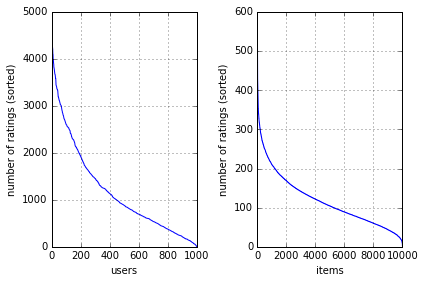

In [3]:
path_dataset = "/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project2/data/data_train.csv"
ratings = load_data(path_dataset)

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

# 2) Run biased MF

In [4]:
valid_ratings, train, test = split_data(ratings, num_items_per_user, num_users_per_item, min_num_ratings=0)

Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1059256
Total number of nonzero elements in test data:117696


In [11]:
from biased_mf_sgd import mf_sgd_biased
lambda_ = 0
num_features = 20
gamma = 0.02
num_epochs = 30
rmse_train, rmse_test = mf_sgd_biased(train, test, num_epochs, gamma, num_features, lambda_)

Learn the matrix factorization using SGD...
iter: 0, RMSE on training set: [ 1.1257821].
RMSE on test data: [ 1.12657245].
iter: 1, RMSE on training set: [ 1.03484074].
RMSE on test data: [ 1.03708034].
iter: 2, RMSE on training set: [ 1.01354111].
RMSE on test data: [ 1.01675649].
iter: 3, RMSE on training set: [ 0.99962882].
RMSE on test data: [ 1.00369173].
iter: 4, RMSE on training set: [ 0.98879458].
RMSE on test data: [ 0.99359545].
iter: 5, RMSE on training set: [ 0.9798532].
RMSE on test data: [ 0.98528313].
iter: 6, RMSE on training set: [ 0.97231631].
RMSE on test data: [ 0.97827335].
iter: 7, RMSE on training set: [ 0.96591521].
RMSE on test data: [ 0.97230812].
iter: 8, RMSE on training set: [ 0.96046644].
RMSE on test data: [ 0.96721627].
iter: 9, RMSE on training set: [ 0.95582771].
RMSE on test data: [ 0.96286768].
iter: 10, RMSE on training set: [ 0.95188139].
RMSE on test data: [ 0.95915588].
iter: 11, RMSE on training set: [ 0.94852732].
RMSE on test data: [ 0.9559904

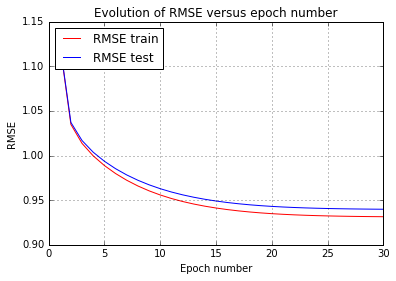

In [12]:
from plots import visualization_rmse_vs_num_epochs
visualization_rmse_vs_num_epochs(num_epochs, rmse_train, rmse_test, "biased_mf")

# 3) make submission

In [8]:
from biased_mf_sgd import mf_sgd_biased_compute_predictions

X_hat, rmse = mf_sgd_biased_compute_predictions(ratings, num_epochs, gamma, num_features, lambda_)

learn the matrix factorization using SGD...
Starting epoch number 0
Starting epoch number 5
Starting epoch number 10
Starting epoch number 15


In [10]:
from collections import deque
import datetime
now = datetime.datetime.now()
now_str = now.strftime("%d-%m-%Y_%Hh%M_%S")
output_path = '/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project2/data/predictions-%s-group-clm.csv' % now_str

indices = extract_indices('/Users/chiara/Documents/EPFL/Master/Ma1/MachineLearning/project2/data/sampleSubmission.csv')

ratings_to_write = deque()
for row, col in indices:
    ratings_to_write.append((row, col, X_hat[row,col]))
    
create_csv_submission(ratings_to_write, output_path)

999   0
